In [9]:
import pickle 
import numpy as np 
with open('mri/scan_0.pkl', 'rb') as f:
    obj = pickle.load(f)
    kspace = obj['kspace']
    target_image = obj['target']
    attributes = obj['attributes'] # include metadata like the maximum value in the kspace measurement

In [10]:
def ifft2c(data):
    """
    center ifft 
    """
    data = np.fft.ifftshift(data)
    data = np.fft.ifft2(data, norm="ortho")
    data = np.fft.fftshift(data)
    
    # turn complex number into a two dimensional array
    return np.stack((data.real, data.imag), axis=-1)

In [11]:
def fft2c(data):
    """
    center fft
    """
    data = np.fft.ifftshift(data)
    data = np.fft.fft2(data, norm="ortho")
    data = np.fft.fftshift(data)

    return np.stack((data.real, data.imag), axis=-1)

In [12]:
def complex_center_crop(data, shape):
    """
    Apply a center crop to the input image or batch of complex images.
    """
    w_from = (data.shape[0] - shape[0]) // 2
    h_from = (data.shape[1] - shape[1]) // 2
    w_to = w_from + shape[0]
    h_to = h_from + shape[1]

    return data[w_from:w_to, h_from:h_to]

In [14]:
# forward kspace to image 
reconstruct_image = ifft2c(kspace)
magnitude_image = np.linalg.norm(reconstruct_image, axis=-1)

crop_image = complex_center_crop(magnitude_image, (320, 320))


# the error is small 
np.mean(np.abs(crop_image-target_image)) / np.mean(target_image)

2.708934418447018e-08

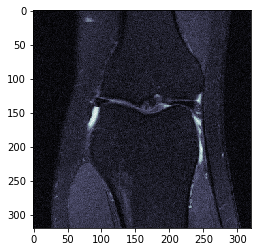

In [15]:
import matplotlib.pyplot as plt 

plt.imshow(crop_image, cmap='bone')

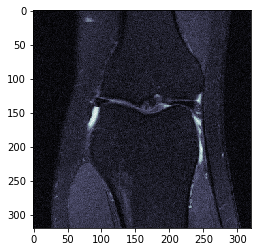

In [16]:
plt.imshow(target_image, cmap='bone')